## Overview

The dataset  we will be using in this  exam is adapted from <a href=https://www.kaggle.com/dgawlik/nyse target=_blank>New York Stock Exchange</a>, where the original raw data can be found.

### Prob 1. Redundancy

Among the columns in the data frame <a href=https://graderdata.s3.amazonaws.com/securities.txt target=_blank>securities</a>, one of them would be helpless as an independent variable for any kind of supervised learning. Which one is it and why?

In [1]:
import pandas as pd
securities = pd.read_csv('https://graderdata.s3.amazonaws.com/securities.csv')

### Your code here

### This prints out any constant column
print filter(lambda col: len(set(securities[col]))==1, securities)  
print '\n'
print securities['SEC filings'].head()

['SEC filings']


0    reports
1    reports
2    reports
3    reports
4    reports
Name: SEC filings, dtype: object


### Prob 2. Sampling

#### Introduction 
(**You may skip and read the actual problem below**)<br>
For each company, we would like to predict its <a href=https://en.wikipedia.org/wiki/Global_Industry_Classification_Standard target =_blank>GICS sector</a> (which is recorded in a column in the data frame <a href=https://graderdata.s3.amazonaws.com/securities.txt target=_blank>securities</a>) based on the <a href=https://graderdata.s3.amazonaws.com/fundamentals.txt>fundamentals</a>.

For simplicity we clean the data with the following process:
- Removed the columns with any missing value: `['Cash Ratio', 'Quick Ratio', 'Current Ratio', 'Estimated Shares Outstanding', 'Earnings Per Share', 'For Year']` from <a href=https://graderdata.s3.amazonaws.com/fundamentals.txt>fundamentals</a>.
- Removed the column `Period End`, grouped the data by `Ticker Symbol` and then took the average of all the numerical columns from the data frame from the previous step.
- Normalized the columns from the previous step.
- Inserted the `GICS Sector` from <a href=https://graderdata.s3.amazonaws.com/securities.txt target=_blank>securities</a> to the data frame from the previous step.

The resulted data frame is <a href =https://graderdata.s3.amazonaws.com/nyse_data.txt target=_blank>nyse_data</a>.

---


#### Problem
We would like to hold out part of the <a href =https://graderdata.s3.amazonaws.com/nyse_data.txt target=_blank>nyse_data</a> as the test dataset with the function `train_test_split`. We would like to:
- hold out **20%** of the observations as test dataset. 
- make sure that the **distribution of the labels `y_train` and `y_test` to be as identical as possible**. 

Fill in the code below to split the data properly.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

nyse_data = pd.read_csv('https://graderdata.s3.amazonaws.com/nyse_data.csv', index_col=0)
X = nyse_data.iloc[:,:-1]
y = nyse_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    ### fill in your code here
                                                    test_size=0.2, 
                                                    stratify=y,
                                                    random_state=1)

## Prob 3. Tune Random Forest Models

With the training set and test set we obtained in the previous question, we would like to tune a random forest model to predict `GICS sector`. Fill the code below to test the parameters:

- `max_depth: [10, 20]`
- `n_estimators: [100, 500]`

Tune the model and print the score on the test set.

**Note**: You may assume that `X_train, X_test, y_train` and `y_test` have been created.

In [107]:
import pandas as pd
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

nyse_data = pd.read_csv('https://graderdata.s3.amazonaws.com/nyse_data.csv', index_col=0)
X = nyse_data.iloc[:,:-1]
y = nyse_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y,
                                                    random_state=1)

sk4 = StratifiedKFold()
rf = RandomForestClassifier()

### Create your grid here
params =  {'max_depth':[10, 20],
           'n_estimators': [100, 500]}

### Your code here
cv_rf = GridSearchCV(rf, param_grid=params, cv=sk4) 
cv_rf.fit(X_train, y_train)                         
print cv_rf.score(X_test, y_test)

0.6


### Prob 4.  Lasso regression

Again, we would like to predict its <a href=https://en.wikipedia.org/wiki/Global_Industry_Classification_Standard target =_blank>GICS sector</a> (which is recorded in a column in the data frame <a href=https://graderdata.s3.amazonaws.com/securities.txt target=_blank>securities</a>) based on the <a href=https://graderdata.s3.amazonaws.com/fundamentals.txt>fundamentals</a>.

We train a lasso model with the penalty constant 10, as the code below. Which variables (there are more than one) eventually make no contribution to the prediction?

**Note**: You may write the actual column names or write the code to return those columns as your answer.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

nyse_data = pd.read_csv('https://graderdata.s3.amazonaws.com/nyse_data.csv', index_col=0)
X = nyse_data.iloc[:,:-1]; y = nyse_data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y,
                                                    random_state=1)

logit = LogisticRegression(penalty='l1', C=10)
logit.fit(X_train, y_train)

### YOur answer here
filter(lambda x: x[1]==0,
       zip(X.columns, np.sum(np.abs(logit.coef_), axis=0)))

[('Long-Term Investments', 0.0),
 ('Other Current Liabilities', 0.0),
 ('Total Assets', 0.0),
 ('Total Liabilities & Equity', 0.0)]

### Prob 5. PCA

We would like to apply principal component analysis (pca) on the numerical columns of the <a href=https://graderdata.s3.amazonaws.com/fundamentals.txt>fundamentals dataset</a>. Again we remove categorical columns and the columns with missing values and then perform pca.

We do it with the code below:
```python
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

fundamentals = pd.read_csv('https://graderdata.s3.amazonaws.com/fundamentals.csv',index_col=0).set_index('Ticker Symbol')
to_be_removed = ['Period Ending','Cash Ratio', 'Quick Ratio', 
                 'Current Ratio', 'Estimated Shares Outstanding', 
                 'Earnings Per Share', 'For Year']
X_train = fundamentals[filter(lambda col: col not in to_be_removed, fundamentals)]

pca = PCA(n_components=10)
pca.fit(X_train)
plt.plot(range(10), pca.explained_variance_ratio_)
```
and we end up with:

<img src=https://s3.amazonaws.com/graderdata/pca_not_normalized.png>

Is there any problem with the steep drop in the ratio of variance explained? How could we modify it?


- **A)** There is no problem.
- **B)** There redundancy in the data is overwhelming. We should remove more columns before applying pca.
- **C)** The missing values removed disturb the distribution of the data. We should impute the missing values instead.
- **D)** The range of different columns vary too much. We should normalize/standardize before applying pca.

In [ ]:
#### Your answer here

Ans = 'D'

### Prob 6 PCA (Continue)

Fix the problem we saw in the last question, and then perform PCA with 10 components on the data. Save the transform data as `pc`.

If your data is transformed correctly, the code

```python
factor_plot(pc, comp1 = 0, comp2 = 2)
```

function should generate the plot below to you.

<img src = https://s3-us-west-2.amazonaws.com/nycdatasciecneipynb/factor_plot.png height=480 width=800>

**Note**: This visualizes the correlation between each original column and the two principal components. We chose to visualize the first ( `comp1=0`) and the third (` comp2=2`) principal components for better visual effect. You are invited to change `comp1` and `comp2` to see the other principal components.

In [1]:
def factor_plot(pc, comp1=0, comp2=1):
    cor_pc1 = map(lambda col: np.corrcoef(X_train[col], pc[:,comp1])[0,1], X_train)
    cor_pc2 = map(lambda col: np.corrcoef(X_train[col], pc[:,comp2])[0,1], X_train)
    col_names = map(lambda col: col, X_train)

    fig = plt.figure(figsize=(20,10))
    plt.scatter(cor_pc1, cor_pc2)

    plt.xlim(None, 1.5)
    plt.xlabel('Correlation with the first principal component', fontsize=17)
    plt.ylabel('Correlation with the third principal component', fontsize=17)
    for col, x, y in sorted(zip(col_names, cor_pc1, cor_pc2), key=lambda x: -x[1])[:3]:
        plt.text(x, y, col, size=15)
        plt.scatter(x, y, c='r', s =50)
    
    for col, x, y in sorted(zip(col_names, cor_pc1, cor_pc2), key=lambda x: -x[2])[:3]:
        plt.text(x, y, col, size=15, rotation=0)
        plt.scatter(x, y, c='r', s =50)

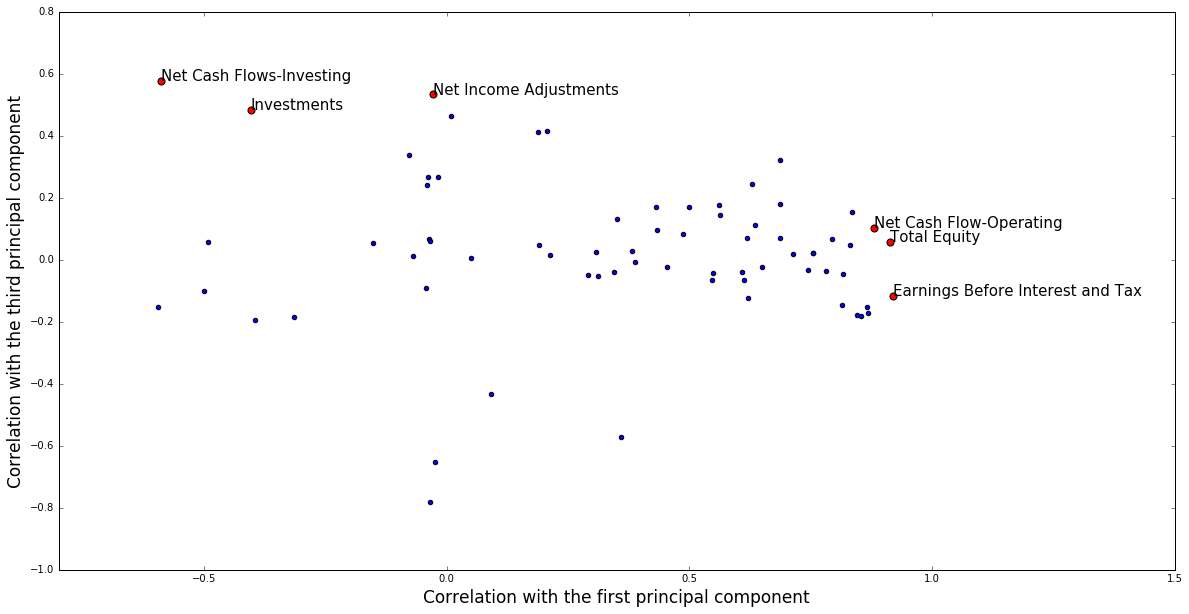

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

fundamentals = pd.read_csv('https://graderdata.s3.amazonaws.com/fundamentals.csv',index_col=0).set_index('Ticker Symbol')

to_be_removed = ['Period Ending','Cash Ratio', 'Quick Ratio', 
                 'Current Ratio', 'Estimated Shares Outstanding', 
                 'Earnings Per Share', 'For Year']


#### Your code here
X_train = fundamentals[filter(lambda col: col not in to_be_removed, fundamentals)]

X_train = (X_train - X_train.mean())/X_train.std()


pca = PCA(n_components=10)
pc = pca.fit_transform(X_train)

#### This part plots
factor_plot(pc, 0, 2)

## Prob 7. Simple linear regression

It seems reasonable that companies perform better in profit also perform better in stock price. We combine <a href=https://graderdata.s3.amazonaws.com/fundamentals.txt>fundamentals</a> and the <a href=https://graderdata.s3.amazonaws.com/prices-split-adjusted.txt>split adjusted price</a>. With some manipulation we obtain the data frame with `Return` and `Earnings Per Share` (EPS) for each stock in a particular period. Part of the data is as below:

```
                                  Return  Earnings Per Share
symbol Period Start Period End                              
AAL    2012-12-31   2013-12-31  0.003199              -11.25
       2013-12-31   2014-12-31  0.004424                4.02
       2014-12-31   2015-12-31 -0.000851               11.39
AAP    2012-12-29   2013-12-28  0.002069                5.36
       2013-12-28   2015-01-03  0.001750                6.75
       2015-01-03   2016-01-02 -0.000152                6.45
AAPL   2013-09-28   2014-09-27  0.001910                6.49
       2014-09-27   2015-09-26  0.000581                9.28
       2015-09-26   2016-09-24  0.000010                8.35
```

Regress the `Return` on `Earnings Per Share`  with `sklearn`. 

If you trained your model correctly, thecode below:

```python
plt.ylim(-0.002, 0.002)
plt.xlim(-0.005, 0.006)
plt.scatter(y, lm.predict(x), alpha=0.3)
plt.xlabel('The actual Return', fontsize=12)
plt.ylabel('EPS', fontsize=12)
```

should generate the plot:

<img src=https://s3.amazonaws.com/graderdata/actual_value_against_predicted.png>

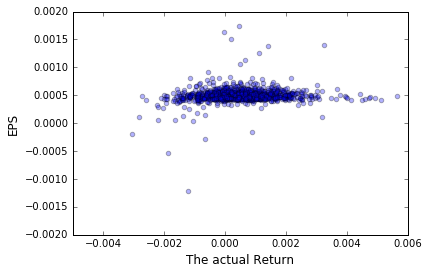

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

return_EPS = pd.read_csv('https://graderdata.s3.amazonaws.com/return_EPS.csv', index_col=[0, 1, 2])

x = return_EPS[['Earnings Per Share']]
y = return_EPS['Return']

### Your code here
lm = LinearRegression()
lm.fit(x, y)


### This part plots
plt.ylim(-0.002, 0.002)
plt.xlim(-0.005, 0.006)
plt.scatter(y, lm.predict(x), alpha=0.3)
plt.xlabel('The actual Return', fontsize=12)
plt.ylabel('EPS', fontsize=12)

### Prob 8. KMeans

With the numerical columns of the <a href =https://graderdata.s3.amazonaws.com/nyse_data.txt target=_blank>nyse_data</a> dataset, write code to perform KMeans clustering with 20 clusters. 


The function `visualize_kmeans` below visualizes the most frequent clusters. If you have a correct cluster, the visualization of the 3 most frequent labels on the columns, `Total Equity` and `Cost of Revenue` should be as below:

<img src=https://s3.amazonaws.com/graderdata/kmeans.png>

In [34]:
%matplotlib inline
import matplotlib
from scipy.stats import itemfreq

def visualize_kmeans(upb, col1, col2):
    lab = map(lambda x: x[0], sorted(itemfreq(k1.labels_), key=lambda x: -x[1])[:upb])
    lst_color = matplotlib.colors.cnames.keys()#[:upb]
    dic = dict(zip(lab, lst_color   ))
    idx = map(lambda x: x in lab, k1.labels_)
    tmp = X_train.loc[idx]
    
    

    if (upb, col1, col2) == (3, 'Total Equity', 'Cost of Revenue'):
        plt.xlim(-.6, 1)
        plt.ylim(-.5, 1)
        
    plt.scatter(tmp[col1], tmp[col2],
                c = map(lambda x: dic[x], k1.labels_[idx]), 
                alpha=0.3)
    plt.xlabel(col1)
    plt.ylabel(col2)

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

nyse_data = pd.read_csv('https://graderdata.s3.amazonaws.com/nyse_data.csv', index_col=0)
X_train = nyse_data.iloc[:,:-1]

#### Your code here
k1 = KMeans(n_clusters=20)
k1.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

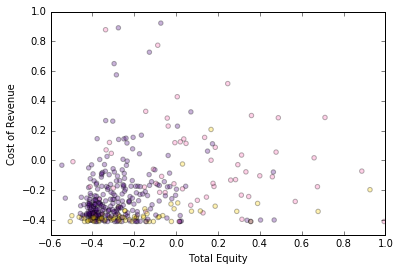

In [37]:
visualize_kmeans(3, 'Total Equity', 'Cost of Revenue')